In [ ]:
!pip install cvlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def preProcess1(img):
    # Define the target color (RGB values)
    target_color = (104, 76, 199)

    # Calculate stretching factor based on the target color
    stretching_factor = 485 / max(target_color)
    balance_factor = 0.2
    block_size = 5
    constant = 1

    def enhance_color(image, stretching_factor):
        # Apply histogram stretching to each channel
        enhanced_image = np.clip(image * stretching_factor, 0, 255).astype(np.uint8)
        return enhanced_image

    def enhance_color_balance(image, balance_factor):
        # Adjust the intensity values of the channels based on the target color
        enhanced_image = np.clip(image * (1 + balance_factor), 0, 255).astype(np.uint8)
        return enhanced_image

    def enhance_adaptive_mean_threshold(image, block_size, constant):
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Calculate the adaptive mean threshold
        adaptive_mean = cv2.adaptiveThreshold(
            gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant
        )

        # Apply the adaptive threshold to the original image
        enhanced_image = cv2.bitwise_and(image, image, mask=adaptive_mean)
        return enhanced_image

    # Apply enhancements sequentially
    enhanced_image1 = enhance_color(img, stretching_factor)
    enhanced_image2 = enhance_color_balance(enhanced_image1, balance_factor)
    enhanced_image3 = enhance_adaptive_mean_threshold(enhanced_image2, block_size, constant)

    # Convert the final enhanced image to grayscale and perform histogram equalization
    processed_image = cv2.cvtColor(enhanced_image3, cv2.COLOR_BGR2GRAY)
    processed_image = cv2.equalizeHist(processed_image)

    # Display the processed image
    plt.imshow(processed_image, cmap='gray')
    plt.title("Processed Image")
    plt.show()

    return img, processed_image

# Example usage
# Assuming 'imagetest' is your input image
# original_img, processed_img = preProcess(imagetest)


In [3]:
def changeVals(gray_image):
    imagetest = np.where(gray_image == 255, 70,  # If the value is 255, replace with 70
                                    np.where(gray_image == 1, 100,
                                            np.where(gray_image == 0, 100,# If the value is 1, replace with 100
                                             np.where(gray_image == 2, 100, gray_image))))  # If the value is 2, replace with 90
    imagetest = imagetest[:-1, :]
    return imagetest

In [4]:

def showProcess(imagetest):
    # Assuming 'image' is your grayscale image
    image = imagetest  # Use your actual image here

    # Apply Canny edge detector
    edges = cv2.Canny(image, threshold1=80, threshold2=99)

    # Apply morphological operations for edge enhancement
    kernel = np.ones((3, 3), np.uint8)
    edges_connected = cv2.dilate(edges, kernel, iterations=1)

    # Display the original, Canny edges, and connected edges
    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Processed Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(edges_connected, cmap='gray')
    plt.title('Connected Edges'), plt.xticks([]), plt.yticks([])

    plt.show()


In [7]:

def getCounts(imagetest):
    # Assuming 'image' is your grayscale image
    image = imagetest  # Use your actual image here

    # Apply Canny edge detector
    edges = cv2.Canny(image, threshold1=80, threshold2=99)

    # Apply morphological operations for edge enhancement
    kernel = np.ones((3, 3), np.uint8)
    edges_connected = cv2.dilate(edges, kernel, iterations=1)

    # Find contours in the connected edges image
    contours, _ = cv2.findContours(edges_connected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image for drawing contours
    image_with_contours = image.copy()

    # Set a threshold for the minimum area of objects (adjust as needed)
    min_area_threshold = 1000

    # Count and filter contours based on area
    count_objects = 0
    ar2=0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_area_threshold:
            ar2=area
            count_objects += 1
            # Optionally, draw the contours on the copy of the original image for visualization
            cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
    
    # Display the original image with contours
    plt.imshow(image_with_contours, cmap='gray')
    plt.title(f'Number of WBCs found: {count_objects}')
    plt.show()


Selected Image Path: C:/Users/Kirk/Pictures/leukocytes/new/seg neutro.JPG


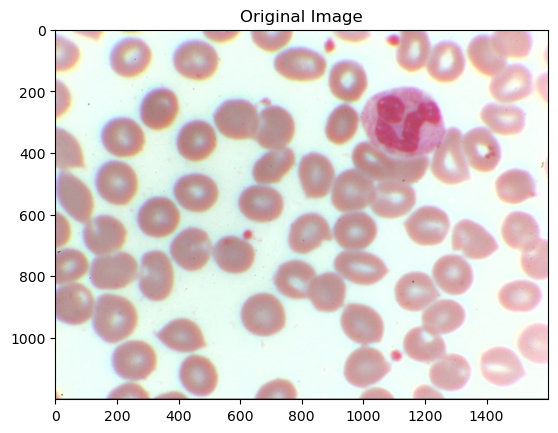

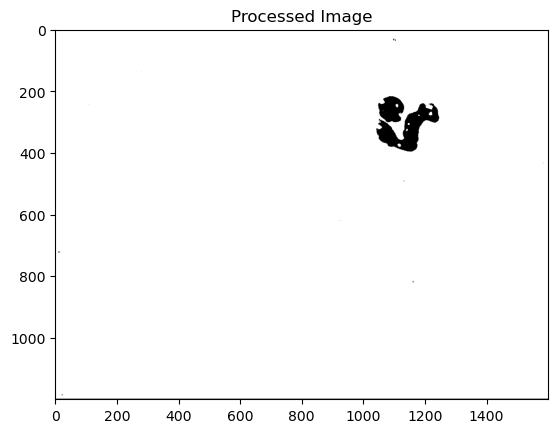

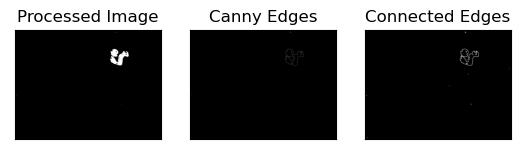

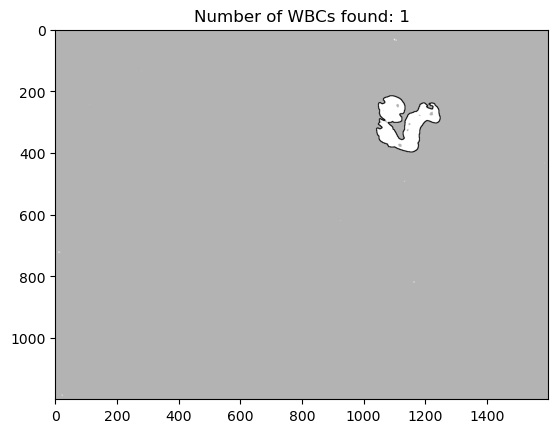

In [12]:
import tkinter as tk
from tkinter import filedialog

def browse_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg;*.gif;*.bmp")])
    if file_path:
        entry_var.set(file_path)

# Create the main window
root = tk.Tk()
root.title("Image Selector")

# Create a StringVar to store the selected file path
entry_var = tk.StringVar()

# Create an Entry widget to display the selected file path
entry = tk.Entry(root, textvariable=entry_var, width=40)
entry.grid(row=0, column=0, padx=10, pady=10)

# Create a "Browse" button to open a file dialog
browse_button = tk.Button(root, text="Browse", command=browse_image)
browse_button.grid(row=0, column=1, padx=10, pady=10)

# Run the Tkinter main loop
root.mainloop()

# After the user selects an image, the file path will be stored in entry_var.get()
selected_image_path = entry_var.get()
print("Selected Image Path:", selected_image_path)


image_origin=cv2.imread(selected_image_path)
plt.imshow(image_origin)
plt.title("Original Image")
plt.show()

mainImg, processedImg=preProcess1(image_origin)
img_array=changeVals(processedImg)
showProcess(img_array)
#radii, perimeters,circularities,bounding_boxes,aspect_ratios,extents,convex_hulls,moments,fit_ellipses
getCounts(img_array)
# print('radius',radi)
# print('perimeter',peri)
# print('circularity', circ)
# print('bounding box', bb)
# print('aspect ratio', ar)
# print('extents', ex)
# # print('convex hulls', ch)
# # print('moments', mo)
# # print('fit ellipse', fe)

In [22]:
import pandas as pd
df = pd.read_pickle('imgData70.pkl')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   6000 non-null   object
 1   Name    6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


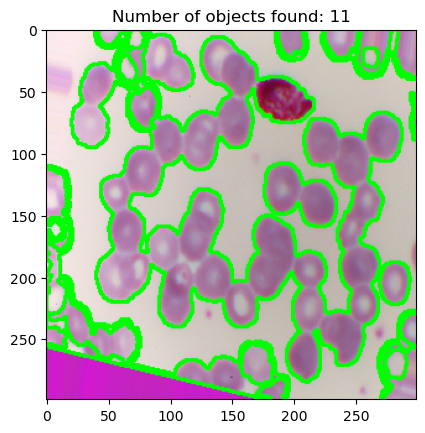

([102, 38, 17, 10, 82, 33, 19, 8, 42, 15, 170],
 [751.327987909317,
  298.5929262638092,
  100.42640578746796,
  93.25483310222626,
  576.0731548070908,
  203.9238795042038,
  87.79898953437805,
  47.55634891986847,
  360.00713980197906,
  134.9116872549057,
  3149.284601330757])

In [25]:
old_threshold = 1000
old_width, old_height = 1024, 1024
new_width, new_height = 299, 299

new_threshold = old_threshold * (new_width * new_height) / (old_width * old_height)
print("Adjusted threshold for (299, 299) image:", new_threshold)


Adjusted threshold for (299, 299) image: 85.25943756103516


<h1> Alternate Interface

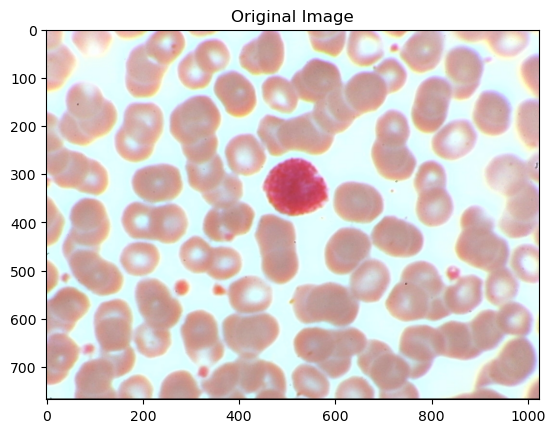

In [11]:
image_origin=cv2.imread(selected_image_path)
plt.imshow(image_origin)
plt.title("Original Image")
plt.show()

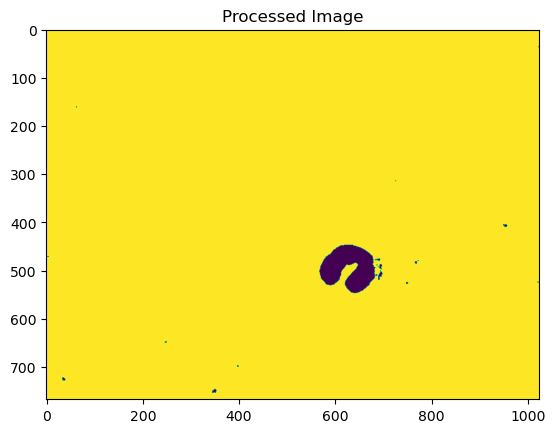

In [19]:
mainImg, processedImg=preProcess(image_origin)
img_array=changeVals(processedImg)


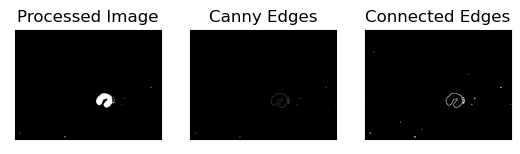

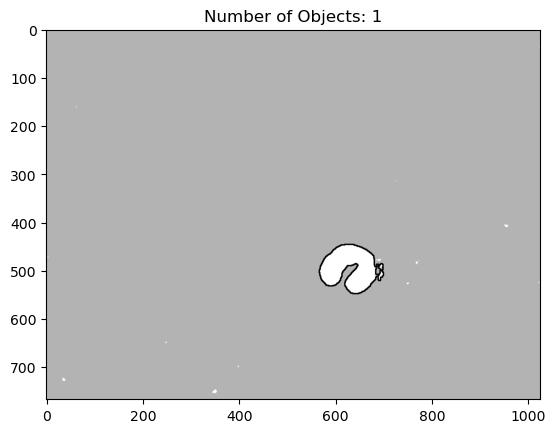

In [20]:
showProcess(img_array)
getCounts(img_array)